<h1 style="font-size:3rem;color:orange"> Exploring the Factors Contributing to Fatal Car Accidents</h1>

**Author**: Mikołaj Nowak  
**University ID**: 151813

# 1. Introduction

The observatory dataset contains information on the number of fatal accidents in America from 2009 to 2012, measured per billion miles. These data represent the frequency of fatal accidents relative to the distance traveled by drivers during that period. It provides insights into the safety of driving and allows for analysis and investigation of the factors contributing to fatal accidents.

The table below provides information on the different variables and their respective sources in the dataset

Factor/Variable | Source
:---|:---
`State` | N/A
`Number of drivers involved in fatal collisions per billion miles` | National Highway Traffic Safety Administration, 2012
`Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding` | National Highway Traffic Safety Administration, 2009
`Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired` | National Highway Traffic Safety Administration, 2012
`Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted`	 | National Highway Traffic Safety Administration, 2012
`Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents` | National Highway Traffic Safety Administration, 2012
`Car Insurance Premiums ($)` | National Association of Insurance Commissioners, 2011
`Losses incurred by insurance companies for collisions per insured driver ($)` | National Association of Insurance Commissioners, 2010

# 2. Importing Essential Python Libraries: Acquiring the Analytical Toolkit

In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import t

%matplotlib inline

# 3. Load Data

In [92]:
url = 'https://raw.githubusercontent.com/MNOWAK1234/StasticalAnalysis/main/bad-drivers.csv'
data = pandas.read_csv(url)

# 4. Exploratory analysis

The aim of this study is to investigate and assess the significance of factors influencing fatal car accidents globally.

Let's verify the accuracy of the data loading process, assess its integrity, examine distributions for any anomalies, as well as scrutinize basic statistical measures.

## 4.1 Data preview:

Check Size of the Dataset:

In [93]:
data.shape

(51, 8)

Initial Data Exploration:

In [94]:
data.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


Data Overview:

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   State                                                                                                   51 non-null     object 
 1   Number of drivers involved in fatal collisions per billion miles                                        51 non-null     float64
 2   Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                    51 non-null     int64  
 3   Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                            51 non-null     int64  
 4   Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                     

Descriptive Statistics:

In [96]:
data.describe()

,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
count,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000
mean,15.790196,31.725490,30.686275,85.921569,88.72549,886.957647,134.493137
std,4.122002,9.633438,5.132213,15.158949,6.96011,178.296285,24.835922
min,5.900000,13.000000,16.000000,10.000000,76.00000,641.960000,82.750000
25%,12.750000,23.000000,28.000000,83.000000,83.50000,768.430000,114.645000
50%,15.600000,34.000000,30.000000,88.000000,88.00000,858.970000,136.050000
75%,18.500000,38.000000,33.000000,95.000000,95.00000,1007.945000,151.870000
max,23.900000,54.000000,44.000000,100.000000,100.00000,1301.520000,194.780000


## 4.2 Check for outliers

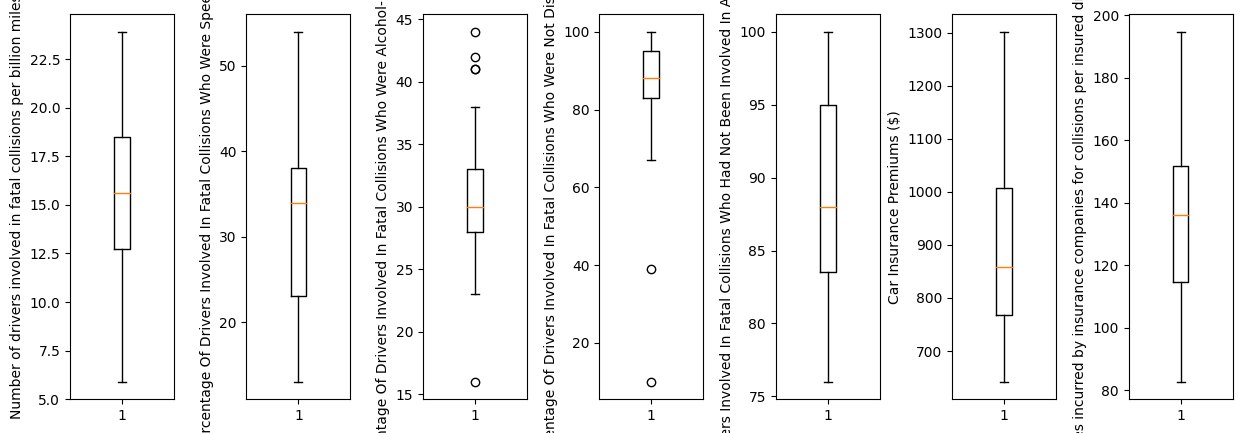

In [97]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(data.columns) - 1, figsize=(15, 5))

# Plot box plot for numeric columns
for i, column in enumerate(data.columns[1:]):
    axes[i].boxplot(data[column])
    axes[i].set_ylabel(column)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.7)

# Display the plots
plt.show()

No outliers were observed besides in the data pertaining to drivers who were either alcohol-impaired or disturbed in fatal collisions. In order to gain a deeper understanding of this particular phenomenon, a further analysis will be conducted to investigate the factors contributing to the occurrence of such outliers and provide insights into the relationship between alcohol impairment or external distractions and fatal accidents.

## 4.3 Inspect data distribution

Create histograms:

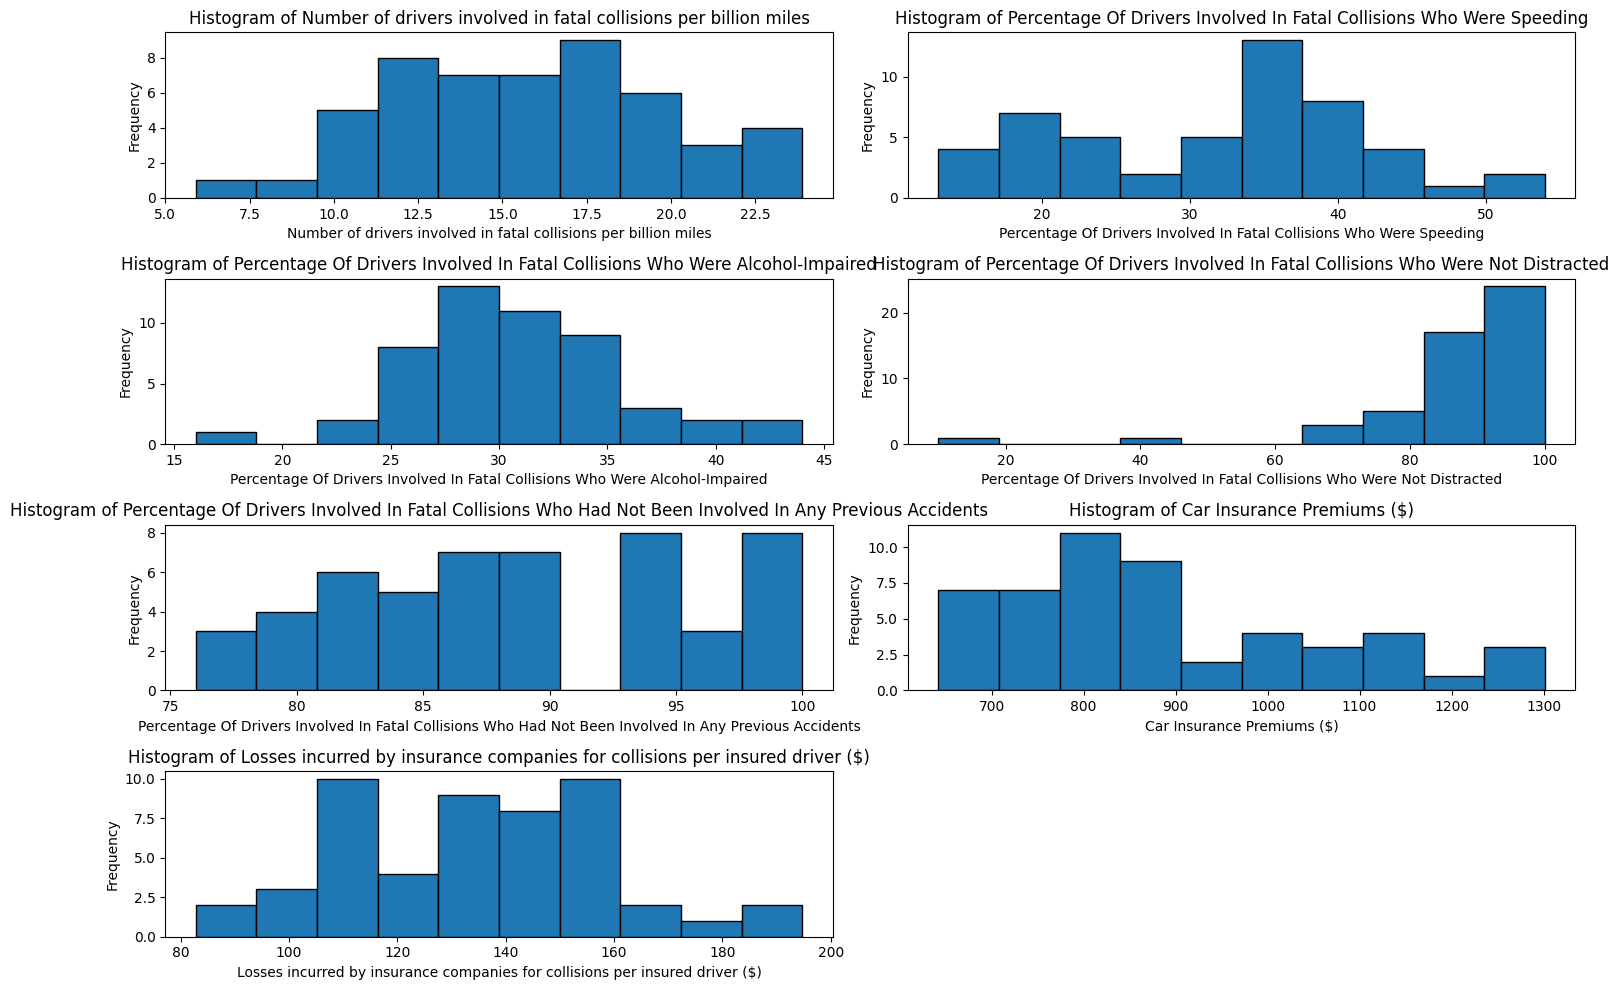

In [98]:
columns_to_plot = data.columns[1:]  # Exclude the first column
num_plots = len(columns_to_plot)
num_rows = 4  # Adjust the number of rows as desired
num_cols = (num_plots + num_rows - 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Adjust the figure size as desired

for i, column in enumerate(columns_to_plot):
    # Calculate subplot position
    row = i // num_cols
    col = i % num_cols
    
    # Create histogram
    axes[row, col].hist(data[column], bins=10, edgecolor='black')
    
    # Customize plot
    axes[row, col].set_title(f"Histogram of {column}")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Frequency")

# Remove empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

Upon examining the data, it is observed that a majority of the variables exhibit a normal distribution. However, certain datasets, such as the percentage of drivers who were not distracted and those involved in previous accidents, display a significant propensity for skewness and outliers. This behavior is expected due to the high concentration of values near the maximum threshold of 100%. Furthermore, the Car Insurance Premiums variable is unlikely to conform to a normal distribution, possibly due to variations in living expenses across different states.

To assess the normality of the data more rigorously, the Shapiro-Wilk test will be employed with a significance level (alpha) set to 0.05. This statistical test will provide a measure of the degree to which each variable adheres to a normal distribution.

In [99]:
for column in data.columns[1:]: # Exclude the first column
    # Perform Shapiro-Wilk test
    statistic, p_value = shapiro(data[column])
    
    # Print the test result for the column
    print(f"Column: {column}")
    print("Test Statistic:", statistic)
    print("p-value:", p_value)
    
    # Check the p-value against a significance level (e.g., 0.05) to make a decision
    alpha = 0.05
    if p_value > alpha:
        print("Data follows a normal distribution.")
    else:
        print("Data does not follow a normal distribution.")
    print()

Column: Number of drivers involved in fatal collisions per billion miles
Test Statistic: 0.9867451190948486
p-value: 0.8354102373123169
Data follows a normal distribution.

Column: Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
Test Statistic: 0.9620321989059448
p-value: 0.10183338820934296
Data follows a normal distribution.

Column: Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
Test Statistic: 0.9565486907958984
p-value: 0.05947394296526909
Data follows a normal distribution.

Column: Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
Test Statistic: 0.6764481663703918
p-value: 2.5187927299441526e-09
Data does not follow a normal distribution.

Column: Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
Test Statistic: 0.9487989544868469
p-value: 0.02809116058051586
Data does not follow a normal distribution.

Column: Car Insurance Premiums ($)
Test Statisti

The results of this test align with the conclusions drawn from the histograms. This suggests that not every variable can be considered when attempting to perform a linear regression analysis.

# 5. Hypothesis

H0: The average number of fatal collisions in states with low car insurance premiums is equal to the average number of fatal collisions in states with high insurance premiums (over 900$).

H1: The average number of fatal collisions in states with low car insurance premiums is different than the average number of fatal collisions in states with high insurance premiums (below 900$).

# 6. Test

## 6.1 Assumptions Check

Let's assess whether the data from the two groups of low and high insurance premiums conform to a normal distribution.

In [127]:
# Divide the data into two groups based on car insurance premiums
low_premiums_group = data[data['Car Insurance Premiums ($)'] < 900]
high_premiums_group = data[data['Car Insurance Premiums ($)'] >= 900]
sample1 = low_premiums_group['Number of drivers involved in fatal collisions per billion miles']
sample2 = high_premiums_group['Number of drivers involved in fatal collisions per billion miles']
alpha = 0.05

#Test low_premiums_group
statistic, p_value = shapiro(sample1)

# Print the test result
print("Test Statistic:", statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("Data follows a normal distribution.")
else:
    print("Data does not follow a normal distribution.")

print()

#Test high_premiums_group
statistic, p_value = shapiro(sample2)

# Print the test result
print("Test Statistic:", statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("Data follows a normal distribution.")
else:
    print("Data does not follow a normal distribution.")

Test Statistic: 0.9742223024368286
p-value: 0.5868111252784729
Data follows a normal distribution.

Test Statistic: 0.9882004261016846
p-value: 0.9971994161605835
Data follows a normal distribution.


Since the data in both groups exhibit a normal distribution, an Snedecor's F-test can be conducted to assess the equality of variances.

In [128]:
sample1 = low_premiums_group['Number of drivers involved in fatal collisions per billion miles']
sample2 = high_premiums_group['Number of drivers involved in fatal collisions per billion miles']
statistic, p_value = f_oneway(sample1, sample2)

print("Test Statistic:", statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("Equal Variations")
else:
    print("Unequal Variations")

Test Statistic: 1.693278203840631
p-value: 0.19925490858534387
Equal Variations


Based on the observed variations, it is reasonable to assume equality of variances. Thus, a traditional t-test for independent samples can be employed to investigate the equality of means.

## 6.2 Performing a test

In [129]:
sample1 = low_premiums_group['Number of drivers involved in fatal collisions per billion miles']
sample2 = high_premiums_group['Number of drivers involved in fatal collisions per billion miles']

# Calculate sample statistics
mean1 = numpy.mean(sample1)
mean2 = numpy.mean(sample2)
n1 = len(sample1)
n2 = len(sample2)
var1 = numpy.var(sample1, ddof=1)  # unbiased variance
var2 = numpy.var(sample2, ddof=1)  # unbiased variance

# Calculate pooled variance
pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)

# Calculate t-value
t_value = (mean1 - mean2) / np.sqrt(pooled_var * (1/n1 + 1/n2))

# Calculate degrees of freedom
df = n1 + n2 - 2

# Calculate p-value
p_value = 2 * (1 - t.cdf(np.abs(t_value), df=df))

# Print the results
print("T-value:", t_value)
print("Degrees of Freedom:", df)
print("P-value:", p_value)

if p_value > alpha:
    print("Accept the null hypothesis (H0): The means are equal.")
else:
    print("Reject the null hypothesis (H0): The means are not equal.")

T-value: 1.301260236786105
Degrees of Freedom: 49
P-value: 0.19925490858534567
Accept the null hypothesis (H0): The means are equal.


## 6.3 Conclusions

Based on the results of this test, it can be inferred that there is no significant difference in means between the group of individuals paying higher insurance premiums and the group paying lower insurance premiums. Consequently, the initial hypothesis stating that the average number of fatal collisions in states with low car insurance premiums is different from the average number of fatal collisions in states with high insurance premiums (below $900) cannot be supported by the available data.

# 7. Regression model

Let's proceed with building a linear regression model to assess the impact of various factors on the number of drivers involved in fatal collisions per billion miles.

## 7.1 Model

In [162]:
X = data[['Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding',
          'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired']]

y = data['Number of drivers involved in fatal collisions per billion miles']


# Add a column of ones for the constant term
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Calculate the regression coefficients using the normal equation
coefficients = np.linalg.inv(X.T @ X) @ (X.T @ y)

# Print the coefficients
print("Intercept:", coefficients[0])
print("Coefficients:", coefficients[1:])

Intercept: 11.487059143850525
Coefficients: [-0.04015906  0.1817491 ]


## 7.2 Conclusions

After constructing a linear regression model, it is evident that the coefficients are nearly zero. This indicates a minimal linear relationship between the factors influencing fatal incidents and the number of incidents per billion miles.
Furthermore, it is noteworthy that the coefficient associated with the 'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding' variable is negative. This implies, based on the linear regression model, that an increase in the percentage of drivers involved in fatal collisions who were speeding is correlated with a decrease in the number of collisions per billion miles. This observation appears highly unlikely and warrants further investigation using the Spearman rank correlation coefficient.

## 7.3 Further Investigation

In [159]:
# Extract the two columns for which you want to calculate the correlation
column1 = data['Number of drivers involved in fatal collisions per billion miles']
column2 = data['Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding'] 

# Calculate the ranks of the values in each column
rank1 = column1.rank()
rank2 = column2.rank()

# Calculate the differences in ranks
diff = rank1 - rank2

# Calculate the sum of squared differences
sum_diff_squared = np.sum(diff**2)

# Calculate the number of data points
n = len(column1)

# Calculate the Spearman's rank correlation coefficient
correlation = 1 - (6 * sum_diff_squared) / (n * (n**2 - 1))

# Print the correlation coefficient
print(f"Spearman's rank correlation coefficient: {correlation}")

Spearman's rank correlation coefficient: -0.01590497737556551


In [160]:
# Extract the two columns for which you want to calculate the correlation
column1 = data['Number of drivers involved in fatal collisions per billion miles']
column2 = data['Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired'] 

# Calculate the ranks of the values in each column
rank1 = column1.rank()
rank2 = column2.rank()

# Calculate the differences in ranks
diff = rank1 - rank2

# Calculate the sum of squared differences
sum_diff_squared = np.sum(diff**2)

# Calculate the number of data points
n = len(column1)

# Calculate the Spearman's rank correlation coefficient
correlation = 1 - (6 * sum_diff_squared) / (n * (n**2 - 1))

# Print the correlation coefficient
print(f"Spearman's rank correlation coefficient: {correlation}")

Spearman's rank correlation coefficient: 0.054683257918552


Despite exploring the relationship using a different and more general Spearman's correlation coefficient, there remains a lack of substantial correlation between the examined variables.

# 8. Final Conclusion

Although these findings may seem counterintuitive, there is no evidence to support the notion that the percentage of drivers being alcohol-impaired, speeding, or distracted contributes to an increase in the number of fatal road accidents.
The study suggests that these specific data about Americans do not yield meaningful insights for predicting road accidents on a global scale.